# Lexical Decision Task
Today we will try to apply the general EEG preprocessing pipeline from the MNE tutorial and the faceWord-experiment to the EEG data from the lexical decision task.


#### Setting up Python
Before starting to analyse our own EEG data, we need to make sure we have our virtual environment we created during the `MNE-tutorial`.

1. Press `Select Kernel`, then `Python Environments...` and then choose any Python kernel. 
2. Run the code chunk below
3. Change the kernel used to run the code in this notebook. Press where it says `Python X.XX.XX` in the top right corner, then `Select Another Kernel`, then `Jupyter kernel...` and then select `env`. If `env` does not show up, press the little refresh symbol! 

In [1]:
!bash ../env_to_ipynb_kernel.sh

Installed kernelspec env in /home/ucloud/.local/share/jupyter/kernels/env


# Analysis of EEG data collected!
The workflow of preprocessing is as follows!
1. Load the data
2. Exclude bad channels
3. Common average reference
4. Filtering
5. Artefact rejection
6. Epoching
7. Downsampling

This is the same workflow as in the `preprocessing_tutorial.ipynb`. This notebook serves as a "skeleton" where you fill out the code you need. All code bits needed can be found in the notebook from the last class. 

<div class="alert alert-block alert-info"><b>Tip:</b>
The MNE package has some really nice documentation! If you have any questions on how to use a function or if you want to see other ways you can plot your data, have a look at it! 

https://mne.tools/stable/index.html

In [1]:
import mne
import os
import matplotlib
import numpy as np

!pip install pandas
import pandas as pd

%matplotlib inline

## 1. Load the data
As we are no longer using sample data from MNE, the process of loading the data will be a bit different. Therefore, code to help you is provided here!

In [58]:
# reading the file & loading in the data
data_folder = '/work/811462/'
group_name = "group3"

# path to the data - MAKE SURE TO CHANGE PATH ACCORDING TO YOUR GROUP NUMBER!
data_path = os.path.join(data_folder, f"{group_name}.vhdr")

raw = mne.io.read_raw_brainvision(data_path)
raw.load_data()

# set standard montage (let MNE know the layout of the electrodes on the cap)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)

Extracting parameters from /work/811462/group3.vhdr...
Setting channel info structure...
Reading 0 ... 220859  =      0.000 ...   220.859 secs...


<RawBrainVision | group3.eeg, 31 x 220860 (220.9 s), ~52.3 MB, data loaded>

### Plotting the sensor layout!
Now lets plot the layout of the channels and see if it matches what you remember from making the recordings!

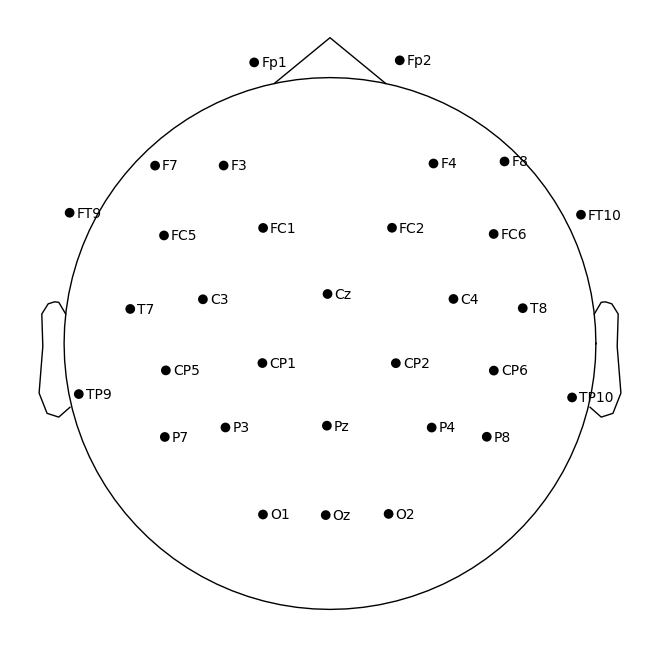

In [7]:
raw.plot_sensors(show_names=True);

### Read in log file
Now we read in the logfile created from running the experiment. We need this information to solve some problems with the triggers later on. 

In [59]:
# reading in the csv file with experiment information
logfile = pd.read_csv(os.path.join(data_folder, f"subject-{group_name[-1]}.csv"))
logfile.head()

,acc,accuracy,average_response_time,avg_rt,background,canvas_backend,clock_backend,color_backend,compensation,coordinates,...,time_target_trigger,time_trial_sequence,title,total_correct,total_response_time,total_responses,trigger_interval,uniform_coordinates,width,word_response
0,100,100,572.636500,572.636500,black,psycho,psycho,psycho,0,uniform,...,NaN,NaN,Lexical decision task,1,572.636500,1,5,yes,1024,z
1,100,100,555.508301,555.508301,black,psycho,psycho,psycho,0,uniform,...,NaN,NaN,Lexical decision task,1,555.508301,1,5,yes,1024,z
2,100,100,566.484299,566.484299,black,psycho,psycho,psycho,0,uniform,...,NaN,NaN,Lexical decision task,1,566.484299,1,5,yes,1024,z
3,100,100,419.809997,419.809997,black,psycho,psycho,psycho,0,uniform,...,NaN,NaN,Lexical decision task,1,419.809997,1,5,yes,1024,z
4,100,100,576.292600,576.292600,black,psycho,psycho,psycho,0,uniform,...,NaN,NaN,Lexical decision task,1,576.292600,1,5,yes,1024,z


## 2. Exclude bad channels

In [60]:
# sometimes filtering before plotting the channels can make it more nice to look at as we are getting rid of some noise!
# BUT IF YOU FILTER HERE NO NEED TO DO IT FURTHER ALONG :D

# raw.filter(None, 40)
# raw.filter(0.1, None)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 s)



<RawBrainVision | group3.eeg, 31 x 220860 (220.9 s), ~52.3 MB, data loaded>

Using matplotlib as 2D backend.


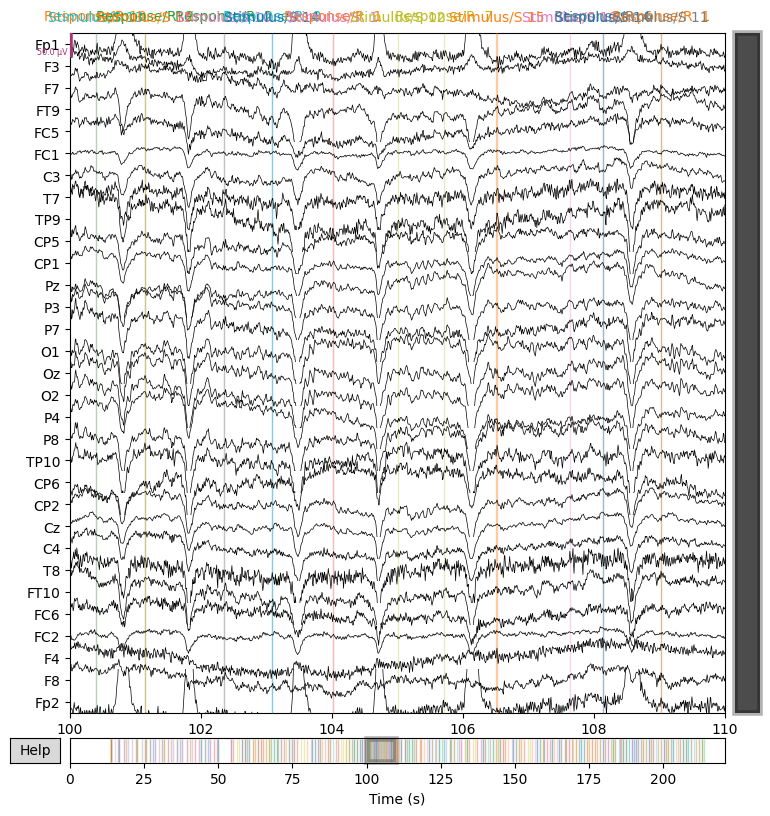

In [61]:
# STEP 1: Plot the raw data to help you identify bad channels
raw.plot(
    n_channels=32, 
    start=100, 
    scalings={"eeg": 250e-7}, # try modifying this value to make the plot more pleasant to look at 
    duration=10);

In [ ]:
# STEP 2: Mark bad channels as bad if there are any!

In [ ]:
# STEP 3: Remove the bad channels

## 3. Common average reference

In [6]:
# STEP 1: Choose the common average reference
raw.set_eeg_reference('average', projection=True)

# STEP 2: applying the reference to the data
raw.apply_proj()

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<RawBrainVision | group3.eeg, 31 x 220860 (220.9 s), ~52.3 MB, data loaded>

## 4. Filtering

In [ ]:
# STEP 1: high-pass filtering the data at 0.1 Hz

# STEP 2: low-pass filtering at 40 Hz

# STEP 3: plot the filtered data for inspection

## 5. Artefact rejection

In [7]:
# Defining the threshold, we will apply it later when we are creating epochs
reject = dict(eeg=150e-6)# 150 µV

## 6. Epoching

This bit requires *a bit more code* today as compared yesterday, as we are experiencing some issues with the triggers. Please go through the following chunks one at a time, and try and see if you can roughly understand what is going on :D

In [56]:
# STEP 1: Locate stimulus events in the recording and save it in a variable called events
events, _ = mne.events_from_annotations(raw)

# lets print out the unique trigger values that we get!
print("These are the trigger values we have in our data:")
print(np.unique(events[:, 2]))

Used Annotations descriptions: ['New Segment/', 'Response/R  1', 'Response/R  2', 'Response/R  3', 'Response/R  4', 'Response/R  5', 'Response/R  6', 'Response/R  7', 'Response/R  8', 'Response/R  9', 'Response/R 10', 'Response/R 11', 'Response/R 12', 'Response/R 13', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15']
These are the trigger values we have in our data:
[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15  1001  1002  1003  1004  1005  1006  1007  1008  1009
  1010  1011  1012  1013 99999]


As we are getting multiple events at the same time, and therefore we remove some events that we do not need (Atleast for now). We only keep the triggers below 1000

In [57]:
events = events[events[:,2]<1000, :]

Throw out the first three triggers + 12 trial runs 

In [51]:
np.unique(events[:, 2], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([25, 18, 10,  7,  5, 13,  9,  6,  9, 15, 13, 16, 17, 19, 21]))

In [55]:
len(events)-12/3

199.0

Okay! So now we need the information from the logfiles to help us align the triggers with the stimuli and responses given by the participant!

,12,13,14,15,16,17,18,19,20,21,...,63,64,65,66,67,68,69,70,71,72
time_prime_trigger,268374.242801,271122.957803,273713.852003,276493.996203,279309.767801,281947.150402,284432.317901,287031.844903,289861.350901,293143.490601,...,402594.056003,404881.569602,407397.031501,409821.006801,412458.270300,414908.579402,417435.491901,419854.469601,422578.992702,425327.311203
time_target_trigger,269567.115702,272219.451703,274904.803202,277540.283803,280442.686401,282961.480703,285563.796502,288082.631603,291018.151302,294354.178201,...,403577.905301,405913.101003,408381.870501,410867.251702,413518.960200,416004.767101,418423.471000,420925.458603,423711.180400,426313.150100
time_resp_trigger,270280.138001,272816.162702,275552.141003,278376.168203,281088.216100,283528.220002,286104.205903,288928.169202,292304.197002,294936.164003,...,404112.215701,406552.186903,409064.300701,411592.308801,414128.229301,416536.188703,419104.172003,421648.174703,424360.220600,427160.196900


In [73]:
practise_trials = pd.DataFrame([logfile['time_prac_prime_trigger'][:12], logfile['time_prac_target_trigger'][:12], logfile['time_prac_resp_trigger'][:12]]).transpose()

['time_prime_trigger', 'time_target_trigger', 'time_resp_trigger']

In [78]:
experimental_trials = pd.DataFrame([logfile['time_prime_trigger'][12:], logfile['time_target_trigger'][12:], logfile['time_resp_trigger'][12:]]).transpose()

experimental_trials.columns

Index(['time_prime_trigger', 'time_target_trigger', 'time_resp_trigger'], dtype='object')

In [77]:
all_trials = pd.concat([practise_trials, experimental_trials])

all_trials

,time_prac_prime_trigger,time_prac_target_trigger,time_prac_resp_trigger,time_prime_trigger,time_target_trigger,time_resp_trigger
0,228280.540302,229334.010102,229912.173402,NaN,NaN,NaN
1,231321.079802,232303.141102,232864.139002,NaN,NaN,NaN
2,234289.438300,235372.178301,235944.155302,NaN,NaN,NaN
3,237374.757901,238374.847900,238800.181601,NaN,NaN,NaN
4,240196.278203,241210.397903,241792.416003,NaN,NaN,NaN
...,...,...,...,...,...,...
68,NaN,NaN,NaN,414908.579402,416004.767101,416536.188703
69,NaN,NaN,NaN,417435.491901,418423.471000,419104.172003
70,NaN,NaN,NaN,419854.469601,420925.458603,421648.174703
71,NaN,NaN,NaN,422578.992702,423711.180400,424360.220600


In [62]:
print(logfile['time_prime_trigger'][12:])
print(logfile['time_target_trigger'][12:])
print(logfile['time_resp_trigger'][12:])

12    268374.242801
13    271122.957803
14    273713.852003
15    276493.996203
16    279309.767801
          ...      
68    414908.579402
69    417435.491901
70    419854.469601
71    422578.992702
72    425327.311203
Name: time_prime_trigger, Length: 61, dtype: float64
12    269567.115702
13    272219.451703
14    274904.803202
15    277540.283803
16    280442.686401
          ...      
68    416004.767101
69    418423.471000
70    420925.458603
71    423711.180400
72    426313.150100
Name: time_target_trigger, Length: 61, dtype: float64
12    270280.138001
13    272816.162702
14    275552.141003
15    278376.168203
16    281088.216100
          ...      
68    416536.188703
69    419104.172003
70    421648.174703
71    424360.220600
72    427160.196900
Name: time_resp_trigger, Length: 61, dtype: float64


In [63]:
rt_log = logfile['time_resp_trigger']-logfile['time_target_trigger']
targ_log = logfile['time_target_trigger']-logfile['time_prime_trigger']
full_log = logfile['time_resp_trigger']-logfile['time_prime_trigger']

In [64]:
rt_log[12:]

12    713.022299
13    596.710999
14    647.337802
15    835.884400
16    645.529699
         ...    
68    531.421602
69    680.701002
70    722.716101
71    649.040200
72    847.046800
Length: 61, dtype: float64

In [65]:
logfile["response_time"][12:]

12    707.539301
13    591.198500
14    641.834699
15    830.351800
16    639.909301
         ...    
68    525.844403
69    675.074600
70    717.133701
71    643.352699
72    841.437902
Name: response_time, Length: 61, dtype: float64

In [80]:
# STEP 2: Create an event dictionary
event_id = {
    # Fill out with triggers defined for the given experiment
    }

In [ ]:
# STEP 3: establish a time window for epochs
tmin, tmax = -0.2, 1

In [82]:
# STEP 4: Create the epochs
epochs = mne.Epochs(
    raw, 
    events,
    event_id = None, 
    tmin = tmin, 
    tmax = tmax, 
    picks=["eeg"],
    baseline=(None, 0), 
    reject=reject, 
    preload=True
    )

RuntimeError: Event time samples were not unique. Consider setting the `event_repeated` parameter."

**At this point call Laura over to have a look!**

## 7. Downsampling

In [ ]:
# STEP 1: Downsample to 250 Hz

# Analysis